In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist


In [16]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [17]:
test = pd.read_csv("test.csv").values.astype('float32')

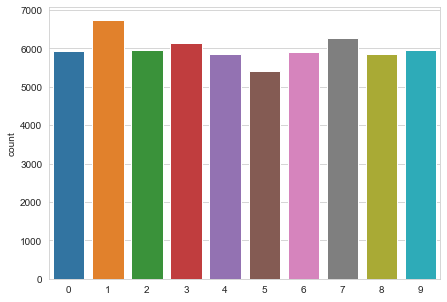

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.countplot(y_train)

In [19]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
test = test.astype('float32')/255 

In [20]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

In [21]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [22]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)


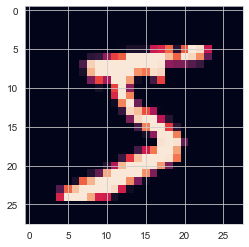

In [23]:
plt.imshow(X_train[0][:,:,0])

Create Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# summarize the model
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 192)       221376    
______________________________________

Evaluate the Model


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 429s 7ms/step - loss: 0.1241 - acc: 0.9597 - val_loss: 0.0459 - val_acc: 0.9850
Epoch 2/20
60000/60000 [==============================] - 444s 7ms/step - loss: 0.0357 - acc: 0.9891 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 3/20
60000/60000 [==============================] - 477s 8ms/step - loss: 0.0248 - acc: 0.9924 - val_loss: 0.0193 - val_acc: 0.9942
Epoch 4/20
60000/60000 [==============================] - 531s 9ms/step - loss: 0.0182 - acc: 0.9945 - val_loss: 0.0280 - val_acc: 0.9917
Epoch 5/20
60000/60000 [==============================] - 566s 9ms/step - loss: 0.0153 - acc: 0.9952 - val_loss: 0.0272 - val_acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 537s 9ms/step - loss: 0.0124 - acc: 0.9963 - val_loss: 0.0202 - val_acc: 0.9943
Epoch 7/20
60000/60000 [==============================] - 484s 8ms/step - loss: 0.0113 - acc: 0.9963 - val_loss: 0.0362 -

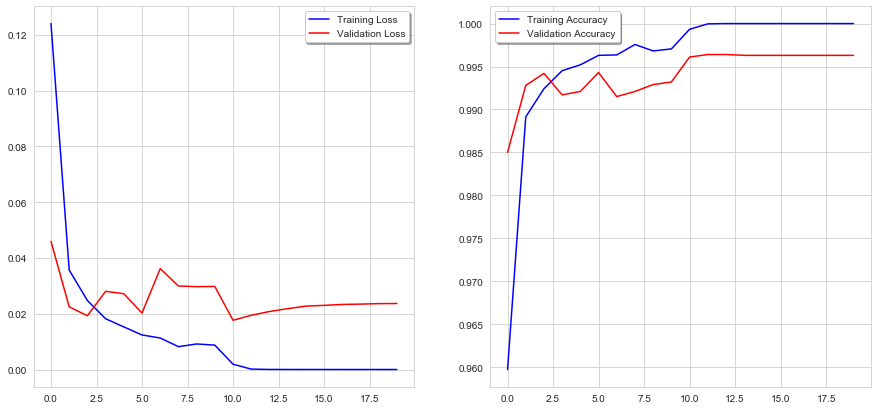

In [25]:
optimizer='adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1,
                              patience=2, min_lr=0.00000001)
history = model.fit(X_train,y_train, batch_size=100,
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 1, callbacks=[reduce_lr], shuffle = True)
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['acc'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_acc'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

Confusion Matrix

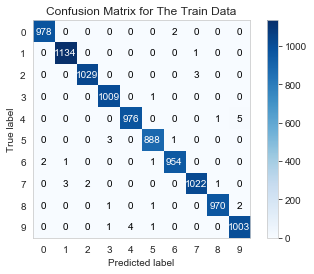

In [26]:
import scikitplot as skplt
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
skplt.metrics.plot_confusion_matrix(y_true,y_pred_classes,title='Confusion Matrix for The Train Data')

Predicting Results on test data